In [22]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

# LSTM Model Training for Stock Prediction

Build and train an LSTM neural network to predict Apple stock prices using 60 days of historical data with technical indicators.

In [23]:
# Load preprocessed data
X_train = np.load('../data/X_train.npy')
y_train = np.load('../data/y_train.npy')
X_test = np.load('../data/X_test.npy')
y_test = np.load('../data/y_test.npy')

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1328, 60, 7)
y_train shape: (1328,)
X_test shape: (287, 60, 7)
y_test shape: (287,)


In [ ]:
# Build LSTM model architecture
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), # expects 60 days of 7 features
    Dropout(0.2), # force model to learn about pattern instead of memorizing
    LSTM(32, return_sequences=False), # output final predictions
    Dropout(0.2), 
    Dense(1) # produces single price prediction
])

model.summary()

c:\Users\bhatt\OneDrive\stock-predictor\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# watch validation loss for improvement
# wait 5 epoch without improvement before stopping
# use best model weights

history = model.fit(
    X_train, y_train, # X = 1328 sequences of 60 days with 7 features. y = 1328 target prices to predict
    validation_data=(X_test, y_test), # test for validation
    epochs=50, # 50 passes through training data
    batch_size=32, # process 32 sequences at a time
    callbacks=[early_stop], # use early stopping
    verbose=1
)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0227 - mae: 0.1091 - val_loss: 0.0038 - val_mae: 0.0499
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0227 - mae: 0.1091 - val_loss: 0.0038 - val_mae: 0.0499
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0030 - mae: 0.0399 - val_loss: 0.0031 - val_mae: 0.0444
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0030 - mae: 0.0399 - val_loss: 0.0031 - val_mae: 0.0444
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - mae: 0.0362 - val_loss: 0.0053 - val_mae: 0.0619
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - mae: 0.0362 - val_loss: 0.0053 - val_mae: 0.0619
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0024 - mae: 0.0354 - val_loss: 0.0058 - val_mae: 0.0668
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0024 - mae: 0.0354 - val_loss: 0.0058 - val_mae: 0.0668
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.002

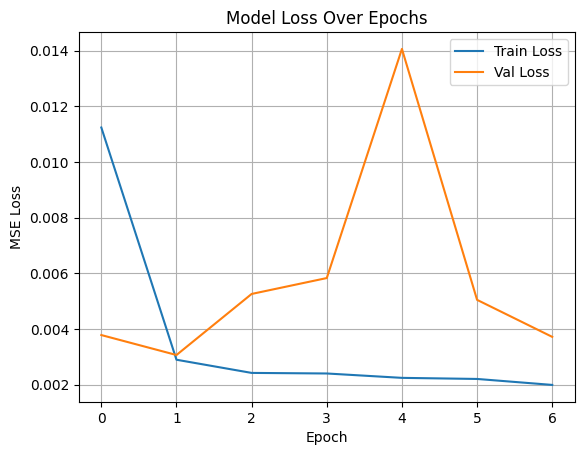

In [27]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid()
plt.show()

In [28]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R² Score: {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Test Loss (MSE): 0.003068
Test MAE: 0.044365
RMSE: 0.055390
R² Score: 0.7415
Test Loss (MSE): 0.003068
Test MAE: 0.044365
RMSE: 0.055390
R² Score: 0.7415


In [29]:
# Save model
import pickle

model.save('../models/lstm_model.h5')
with open('../models/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print("Model and training history saved successfully!")

Model and training history saved successfully!


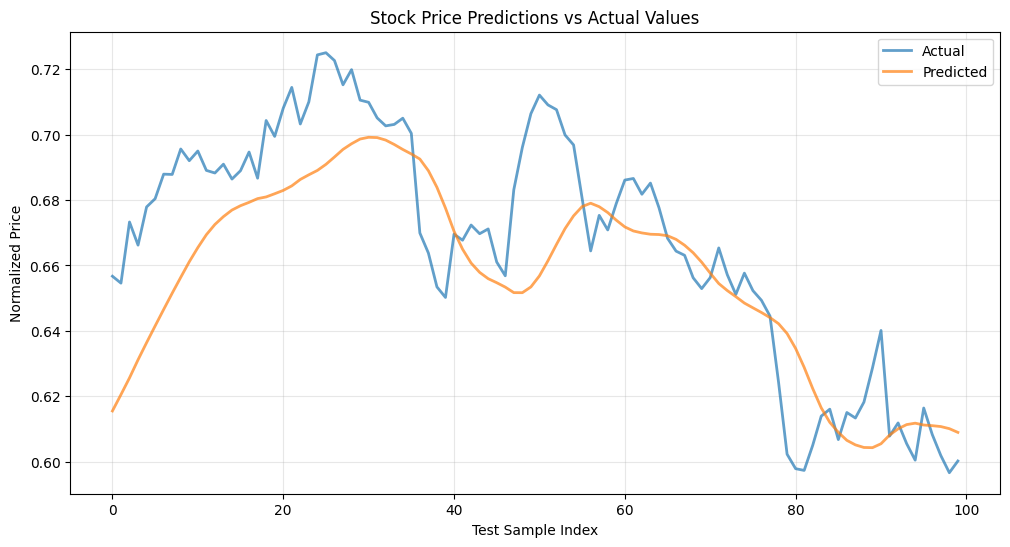

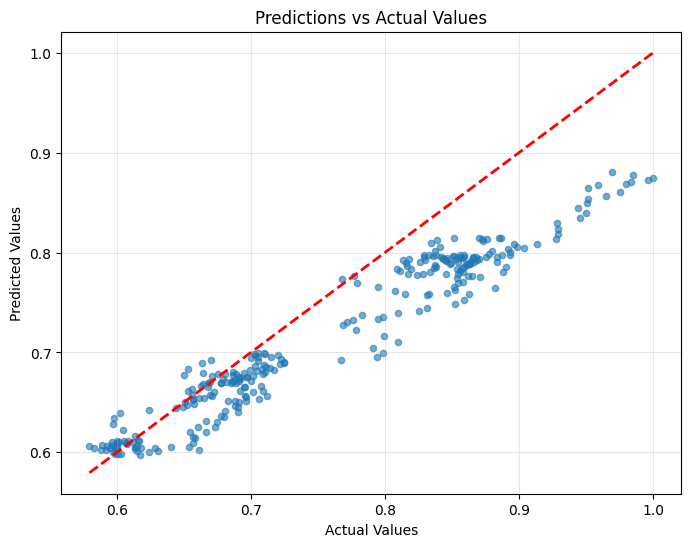

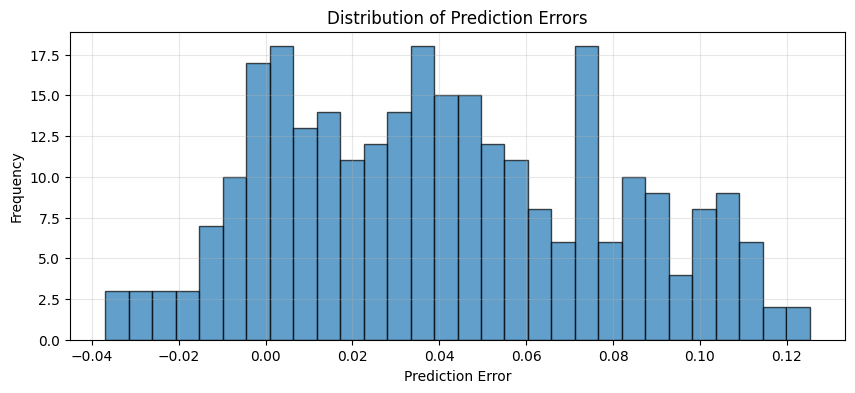

In [30]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual', alpha=0.7, linewidth=2)
plt.plot(y_pred[:100], label='Predicted', alpha=0.7, linewidth=2)
plt.title('Stock Price Predictions vs Actual Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.grid(True, alpha=0.3)
plt.show()

# Error distribution
errors = y_test - y_pred.flatten()
plt.figure(figsize=(10, 4))
plt.hist(errors, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)
plt.show()

## Training Results Summary

**Model Architecture:**
- Input: 60 days of 7 features (Close, SMA, RSI, MACD, lag features)
- Architecture: 2 LSTM layers (64 → 32 units) with dropout regularization
- Output: Next day's normalized closing price

**Training:**
- Optimizer: Adam
- Loss Function: Mean Squared Error (MSE)
- Early Stopping: Patience of 5 epochs
- Batch Size: 32 samples

The model is trained and ready for stock price prediction.